<a href="https://colab.research.google.com/github/PRATEEK-RAJ-GUPTA/DEEP_LEARNING101/blob/main/TENSORFLOW_FUNCTIONALITY_2_CODE_FOR_DENSE_LAYER_AUTOMATIC_DIFFERENTIATIONSEQUNETIAL_API_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SHAPE DEFINE-->DIMENSION AND SIZE OF TESNOR**

**RANK DEFINE-->NUMBER OF DIMENSION**

In [79]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sport=tf.constant('Tennis',tf.string)
number=tf.constant(1.41421356237,tf.float64)
print('number is a {}-d tensor'.format(tf.rank(number).numpy()))
print("`sport` is a {}-d tensor".format(tf.rank(sport)))

number is a 0-d tensor
`sport` is a 0-d tensor


In [9]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(),tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [22]:
matrix=tf.constant([[1,2,3],
                    [1,2,3]])

assert isinstance(matrix,tf.Tensor)
assert tf.rank(matrix).numpy() == 2
#so in the above matrix is a 2-d matrix with rank 2

In [26]:
images=tf.zeros([10,256,256,3])
assert tf.shape(images).numpy().tolist()==[10,256,256,3]
print(images)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

In [27]:
row_vector = matrix[1]
column_vector = matrix[:,1]
scalar = matrix[0, 1]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [1 2 3]
`column_vector`: [2 2]
`scalar`: 2


In [29]:
a=tf.constant(15)
b=tf.constant(61)

c1=tf.add(a,b)
c2=a+b#tensorflow override this instruction and convert it in to a tensor operation
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


In [33]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c =tf.add(a,b)
  d = tf.subtract(b,1)
  e =tf.multiply(c,d)
  return e
     

In [36]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


**Neural networks in TensorFlow**

We can also define neural networks in TensorFlow. TensorFlow uses a high-level API called Keras that provides a powerful, intuitive framework for building and training deep learning models.

**Dense_Layer code in NEURAL NETWORK**

In [43]:
### Defining a network Layer ###

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self,n_output_nodes):
    super(OurDenseLayer,self).__init__()
    self.n_output_nodes=n_output_nodes
  

  def build(self,input_shape):
    d=int(input_shape[-1]) # taking the column of the input shape
    self.W=self.add_weight('weight',shape=[d,self.n_output_nodes]) # if there are 2 inputs nodes(columns) and 3 output node than each input node will have a 3 w's
    self.b=self.add_weight('bias',shape=[1,self.n_output_nodes])


  def call(self,x):

    z=tf.linalg.matmul(x,self.W) + self.b

    y=tf.math.sigmoid(z)

    return y

tf.random.set_seed(1)
layer=OurDenseLayer(3)
layer.build((1,2))
x_input=tf.constant([[1,2.]],shape=(1,2))
y=layer.call(x_input)


print(y.numpy())



[[0.7399751  0.44709632 0.9608201 ]]


**SEQUENTIAL_LAYER API CODE IN KERAS**

 With the Sequential API, you can readily create neural networks by stacking together layers like building blocks.



In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#defining the number of output node
n_output_nodes=3

#defining the type of model we will be using
model=Sequential()

dense_layer=Dense(n_output_nodes,activation='sigmoid')

model.add(dense_layer)


In [47]:
x_input=tf.constant([[1,2.]],shape=(1,2))

model_output=model(x_input).numpy()
print(model_output)

[[0.77951616 0.32650504 0.74997336]]


In addition to defining models using the Sequential API, we can also define neural networks by directly **subclassing the Model class**, which groups layers together to enable model training and inference. The Model class captures what we refer to as a "model" or as a "network". Using Subclassing, we can create a class for our model, and then define the forward pass through the network using the call function. Subclassing affords the flexibility to define custom layers, custom training loops, custom activation functions, and custom models. Let's define the same neural network as above now using Subclassing rather than the Sequential model.

In [50]:
from tensorflow.keras import Model

class SubclassModel(tf.keras.Model):

  def __init__(self,n_output_nodes):
    super(SubclassModel,self).__init__()
    #defining the single dense layer of our model
    self.dense_layer=Dense(n_output_nodes,activation='sigmoid')

  def call(self,input):
    return self.dense_layer(input)

In [53]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input).numpy())
     

[[0.922794   0.28081274 0.85635036]]


Importantly, Subclassing affords us a lot of flexibility to define custom models. For example, we can use boolean arguments in the call function to specify different network behaviors, for example different behaviors during training and inference. Let's suppose under some instances we want our network to simply output the input, without any perturbation. We define a boolean argument isidentity to control this behavior:

In [61]:
class IdentityModel(tf.keras.Model):
  
   def __init__(self,n_output_nodes):
     super(IdentityModel,self).__init__()
     self.Dense_layer=Dense(n_output_nodes,activation='sigmoid')

   def call(self,inputs,isidentity=False):
     x=self.Dense_layer(inputs)
     if isidentity==True:
       return inputs.numpy()
     else:
        return self.Dense_layer(inputs)



In [69]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
#to pass the input into the model and call with and without the identity
out_activate = model.call(x_input)
out_identity = model.call(x_input,isidentity=True)
print("Network output with activation: {}; network identity output: {}".format(out_activate,out_identity))

Network output with activation: [[0.8726766 0.2958583 0.4963651]]; network identity output: [[1. 2.]]


## **Automatic differentiation in TensorFlow**

Automatic differentiation is one of the most important parts of TensorFlow and is the backbone of training with backpropagation. We will use the TensorFlow GradientTape **tf.GradientTape** to trace operations for computing gradients later.

When a forward pass is made through the network,**all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular tf.GradientTape can only compute one gradient**, and subsequent calls throw a runtime error. However, we can compute multiple gradients over the same computation by creating a **persistent gradient tape.**

First, we will look at how we can compute gradients using GradientTape and access them for computation. We define the simple function **y=x^2**
 and compute the gradient:

In [71]:
x=tf.Variable(3.0)

with tf.GradientTape() as tape:
  #define the function
  y=x*x

dy_dx=tape.gradient(y,x)

assert dy_dx.numpy()==6.0


1.   WE PERFROM SGD FOR DEEP LEARNING
2.   L=(X-X_f)^2
3.   L IS TRHE LOSS WE ARE TRYING TO MINIMISE




Initializing x=[[0.6118191]]


Text(0, 0.5, 'x value')

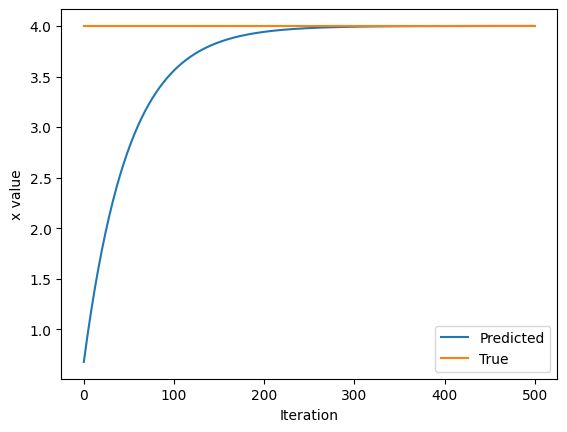

In [80]:
#Initialize a random value for our initial x
x=tf.Variable([tf.random.normal([1])])
print('Initializing x={}'.format(x.numpy()))

learning_rate=1e-2
history=[]
#defining the target value
x_f=4

#computing the derivative of the loss wrt to the x and performing SGD

for i in range(500):
  with tf.GradientTape() as tape:
    loss=(x-x_f)**2

#loss minimization using gradientTape
  gradient=tape.gradient(loss,x)
  new_x=x-learning_rate*gradient
  x.assign(new_x)
  history.append(x.numpy()[0])#[0] convert the history from 2-d array to 0-d array


# Plot the evolution of x as we optimize towards x_f
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
     

In [77]:
history

[array([[-0.367872]], dtype=float32),
 array([[-0.28051457]], dtype=float32),
 array([[-0.19490427]], dtype=float32),
 array([[-0.11100619]], dtype=float32),
 array([[-0.02878606]], dtype=float32),
 array([[0.05178966]], dtype=float32),
 array([[0.13075386]], dtype=float32),
 array([[0.2081388]], dtype=float32),
 array([[0.28397602]], dtype=float32),
 array([[0.3582965]], dtype=float32),
 array([[0.4311306]], dtype=float32),
 array([[0.502508]], dtype=float32),
 array([[0.57245785]], dtype=float32),
 array([[0.6410087]], dtype=float32),
 array([[0.70818853]], dtype=float32),
 array([[0.7740248]], dtype=float32),
 array([[0.8385443]], dtype=float32),
 array([[0.90177345]], dtype=float32),
 array([[0.96373796]], dtype=float32),
 array([[1.0244632]], dtype=float32),
 array([[1.0839739]], dtype=float32),
 array([[1.1422944]], dtype=float32),
 array([[1.1994485]], dtype=float32),
 array([[1.2554595]], dtype=float32),
 array([[1.3103503]], dtype=float32),
 array([[1.3641433]], dtype=float32)